# <center> PHY68 Project 2: The Time Independent Schrödinger Equation </center>
### <center> By Daniel Opara </center>
### <center> February 28, 2023 </center>

## Section 1: Intro to Time Independent Schrodinger Equation 

In this project, we will attempt to numerically solve the time independent schrodinger equation (TISE). The Schrödinger Equation is a wavefunction that predicts the future behavior of a dynamic system. To elaborate, it is a wave equation in terms of the wavefunction which predicts analytically and precisely the probability of events or outcome. The TISE is useful for finding energy values for a one dimensional system. The TISE is a second order linear ODE that reads as follows:

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x), \tag{1}
\end{equation}

where $m$ is the mass of a particle at atomic length scales, $E$ is its kinetic energy, and $V(x)$ is a potential field. The solution of this equation allows one to obtain the probability $\vert \psi(x) \vert^2$ of finding the particle between the range $x$ and $x+dx$.

## Section 2: Case Study 1 - Finite Potential Well

This case, known as an extention of the Particle in a Box model (Infinite Potential Well), describes a particle free to move in a space surrounded by barriers. Unlike the Infinite Potential Well model, the particle is contained in a box with finite potential walls, meaning there is a probability associated with the particle being found outside the box. Given the parameter x a specific position, the potential function takes the form:

\begin{equation}
  V(x) =
    \begin{cases}
      0 & |x|<L/2\\
      V_{0} & |x|\geq L/2 \\
    \end{cases} \tag{2}  
\end{equation}

Where L is the length of the box.

Since there is a chance of the particle being found outside the box, the wavefunction does not necessarily vanish outside the barriers. This means that our wavefunction will take three different forms: 1) $\psi_{1}(x)$ when the particle is located to the left of the box, 2) $\psi_{2}(x)$ when the particle is located inside the box, and 3) $\psi_{1}(x)$ when the particle is located to the right of the box. Note that the wavefunction, its derivative, and the particle mass must be continuous.

For the area inside the well, our general solution will be similar to that of the infinite potential well problem: 

\begin{equation}
\psi(x)=A\sin(kx)+B\cos(kx) \tag{3}
\end{equation}

For the areas outside the well, our general solution will be: 

\begin{equation}
\psi(x)=Ce^{\alpha x} + De^{-\alpha x} \tag{4}
\end{equation}

Where $\alpha = \sqrt{\frac{2m(V_{0} - E)}{\hbar^2}}$ and $k = \sqrt{\frac{2mV_{0}}{\hbar^2}}$



For the the area to the left of well, our general solution simplifies to 

\begin{equation}
\psi(x)=Ce^{\alpha x} \tag{5}
\end{equation}

Since it presents a physically viable solution. Likewise, to the right of the potential well, our general solution simpliefies to:

\begin{equation}
\psi(x)=De^{-\alpha x} \tag{4}
\end{equation}

Making use of a symmetry theorem in quantum mechanics, there are two sorts of solutions for which our potential function $V(x)$ is either even or odd. Even solutions are symmetric about $x = 0$ and odd solution are antisymmetric. With that said our solutions are either $\psi(x)=A\sin(kx)$ or $\psi(x)=B\cos(kx)$.



\begin{equation}
E=\frac{\hbar ^2 \pi^2 n^2}{2m} \tag{5}
\end{equation}


### Library Imports

In [323]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

In [324]:
# Setting up intial conditions
N = 1000                  # number of points to take
psi = np.zeros([N,2])     # Wave function values and its derivative (psi and psi')
psi0 = np.array([0,1])             # Wave function initial states
Vo = 20
E = 0.0                   # Energy level
b = 2                     # point outside of well where we need to check if the function diverges
x = np.linspace(-b, b, N)    # x-axis

To solve the differential equation, we need to write the Schrödinger equation in its state-space representation, where the first state is $\psi$ and the second state is $\frac{d\psi}{dx}$. Referencing (1), we can represent these states as follows:

### First state

\begin{equation}
\psi(x) \nonumber
\end{equation}

### Second state

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}+V(x)\psi(x)=E\psi(x) \nonumber
\end{equation}

\begin{equation}
-\frac{\hbar^2}{2m}\frac{d^2\psi(x)}{dx^2}=E\psi(x)-V(x)\psi(x) \nonumber
\end{equation}

\begin{equation}
\frac{d^2\psi(x)}{dx^2}=-\frac{2m}{\hbar^2}[E\psi(x)-V(x)\psi(x)] \nonumber
\end{equation}

If we make $\frac{d\psi(x)}{dx} = u$, then we get

\begin{equation}
\frac{du}{dx}=-\frac{2m}{\hbar^2}[E\psi(x)-V(x)\psi(x)] \nonumber
\end{equation}

In the equation below, $\frac{\hbar^2}{2m} = 1$ 


In [325]:
def V(x):
    """
    Potential function in the finite square well. Width is L and value is global variable Vo
    """
    L = 1
    if abs(x) > L:
        return 0
    else:
        return Vo
    
def schrodingerEq(psi, x, energy):
    """
    Returns derivatives for the 1D schrodinger eq.
    Requires E for energy level of particle. State0 is
    first derivative of the wave function psi, and State1 is
    the second derivative.
    """
    state0 = psi[1]
    state1 = -2.0*(V(x) - energy)*psi[0]
    
    
    return np.array([state0, state1])
    

In [326]:
def calcWaveFunction(energy):
    """
    Calculates wavefunction psi for the given value
    of energy E and returns value at point b
    """
    global psi
    psi = odeint(schrodingerEq, psi0, x, args=(energy,))
    return psi[-1,0]
    

In [327]:
def rootFinder(x,y):
    """
    Locates the roots in y = f(x)
    """
    all_zeroes = []
    s = np.sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(calcWaveFunction, x[i], x[i+1])
            all_zeroes.append(zero)
    return all_zeroes

Energies for the bound states are: 
5.99
11.91
16.35
19.08


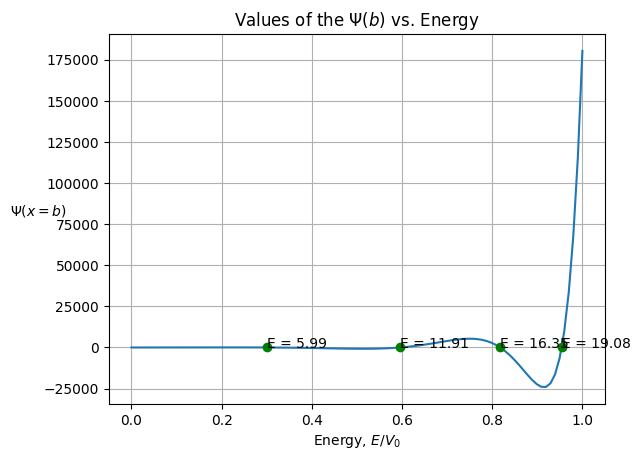

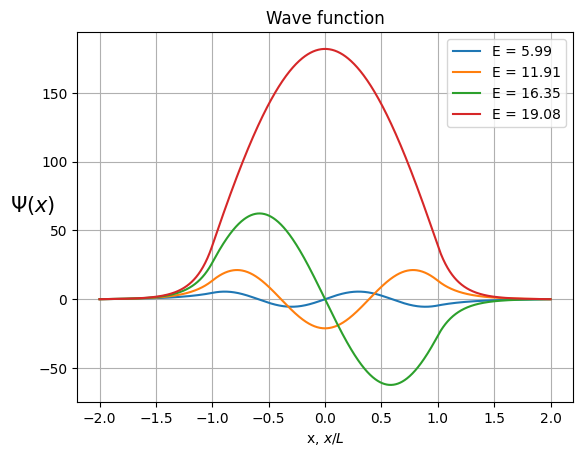

In [328]:
def main():
    # main program        
 
    en = np.linspace(0, Vo, 100)   # vector of energies where we look for the stable states
 
    psi_b = []      # vector of wave function at x = b for all of the energies in en
    for e1 in en:
        psi_b.append(calcWaveFunction(e1))     # for each energy e1 find the the psi(x) at x = b
    E_zeroes = rootFinder(en, psi_b)   # now find the energies where psi(b) = 0 
 
    # Print energies for the bound states
    print("Energies for the bound states are: ")
    for energies in E_zeroes:
        print("%.2f" %energies)
     # Plot wave function values at b vs energy vector
    plt.figure()
    plt.plot(en/Vo,psi_b)
    plt.title('Values of the $\Psi(b)$ vs. Energy')
    plt.xlabel('Energy, $E/V_0$')
    plt.ylabel('$\Psi(x = b)$', rotation='horizontal')
    for energies in E_zeroes:
        plt.plot(energies/Vo, [0], 'go')
        plt.annotate("E = %.2f"%energies, xy = (energies/Vo, 0), xytext=(energies/Vo, 30))
    plt.grid()
    plt.show()
 
    # Plot the wavefunctions for first 4 eigenstates
    plt.figure(2)
    for energies in E_zeroes[0:4]:
        calcWaveFunction(energies)
        plt.plot(x, psi[:,0], label="E = %.2f"%energies)
    plt.legend(loc="upper right")
    plt.title('Wave function')
    plt.xlabel('x, $x/L$')
    plt.ylabel('$\Psi(x)$', rotation='horizontal', fontsize = 15)
    plt.grid()
 
if __name__ == "__main__":
    main()